#--------------- Assignment 1 ------------------

In [177]:
import datetime
import socket

# Get local time
local_time = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

# Get computer ID or hostname
computer_id = socket.gethostname()

# Print output with local time and computer ID
print('Assignment 1: Solutions by Mohammed Shahadat Hossain') # Please change your name here
print('Local Time:', local_time)
print('Computer ID:', computer_id)

Assignment 1: Solutions by Mohammed Shahadat Hossain
Local Time: 2024-05-14 06:59:40
Computer ID: surface4


In [178]:
# Import Libraries

import pandas as pd # Data manipulation
import numpy as np # Matrix calculation
import geopandas as gpd # GIS of Pandas
import seaborn as sb # Parof of matplotlib for Data Visualization 
import matplotlib.pyplot as plt # data Visualization 


#Question 1: 

In [199]:
# Load datasets
df_1 = pd.read_csv(r'C:\Palette Skills\Stream3\df_1.csv')
df_2 = pd.read_csv(r'C:\Palette Skills\Stream3\df_2.csv')

# clean by trimming whitespace and converting to a common case.
df_1['RM'] = df_1['RM'].str.strip().str.lower()
df_2['RM'] = df_2['RM'].str.strip().str.lower()

# Remove duplicates from RM column
df_1.drop_duplicates(subset=['RM'],keep='first', inplace=True)
df_2.drop_duplicates(subset=['RM'],keep='first', inplace=True)

#Merge the DataFrames 
merged_df = pd.merge(df_1, df_2, on='RM', how='outer')

In [198]:
# Print unique RM counts
print('Unique RMs in df_1:', df_1['RM'].nunique())
print('Unique RMs in df_2:', df_2['RM'].nunique())

unmatched_rms = set(df_2['RM'].unique()) - set(merged_df['RM'].unique())

print('RM After Merging:', merged_df['RM'].nunique())
print('RMs not matched:', unmatched_rms) 

Unique RMs in df_1: 473
Unique RMs in df_2: 464
RM After Merging: 500
RMs not matched: set()


#Question 2:

<Axes: >

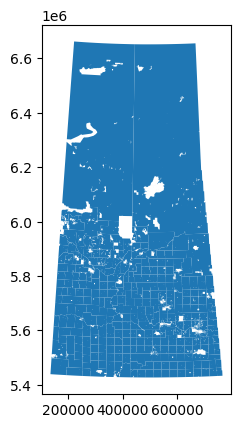

In [183]:
# Load the shapefile & PLot
gdf = gpd.read_file(r'C:\Palette Skills\Stream3\RM_shapefile\RuralMunicipality.shp')
gdf.plot()



<Axes: >

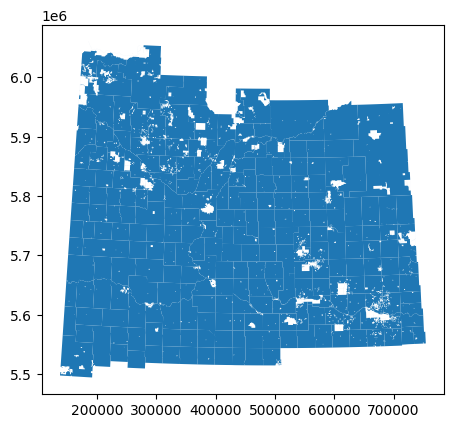

In [211]:
# Convert both columns to string 
gdf['RMNO'] = gdf['RMNO'].astype(str)
df_1['RM'] = df_1['RM'].astype(str)

# Merging RM data with GIS
gdf_merged=pd.merge(gdf.rename(columns={'RMNO':'RM'}),df_1, on='RM', how='inner')
  
gdf_merged.plot()

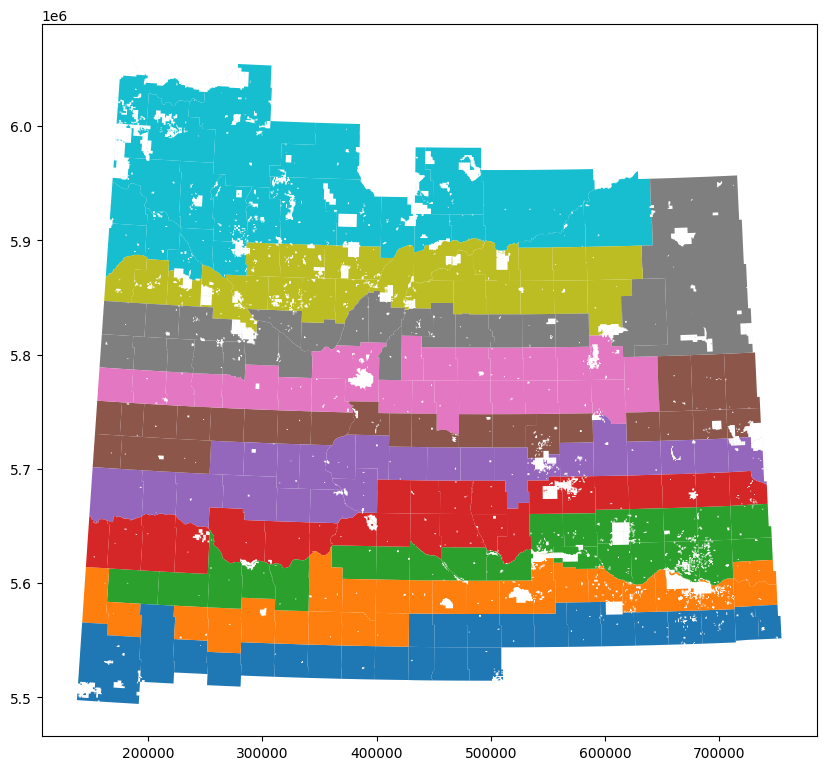

In [212]:
# Plot the filtered data
fig, ax = plt.subplots(figsize=(10, 10))
gdf_merged.plot(ax=ax, column='RM', legend=False)  
plt.show()
